In [80]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# UPLOAD DATA

# DATA UNDERSTANDING & CLEANING

In [81]:
data = pd.read_csv('transaction_data.csv')
data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,-1,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


## Mencari Data Hilang

### Posisi Data Yang Hilang

In [82]:
missing = data.isna().sum().rename('Jumlah')

# ubah ke dataframe (dari series)
missing = pd.DataFrame(missing)
missing

,Jumlah
UserId,0
TransactionId,0
TransactionTime,0
ItemCode,0
ItemDescription,2908
NumberOfItemsPurchased,0
CostPerItem,0
Country,0


In [83]:
missing['Persentase'] = round(missing['Jumlah']  / len(data) * 100,2)
missing

,Jumlah,Persentase
UserId,0,0.00
TransactionId,0,0.00
TransactionTime,0,0.00
ItemCode,0,0.00
ItemDescription,2908,0.27
NumberOfItemsPurchased,0,0.00
CostPerItem,0,0.00
Country,0,0.00


Persentase data yang missing sebesar 0.27% mengindikasi data ini kecil karena dibawah 1%

In [84]:
data[data.isna().any(axis=1)]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
322,-1,6314803,Mon Jan 14 11:15:00 IST 2019,495159,NaN,9,0.0,United Kingdom
762,-1,6206420,Mon Nov 05 05:34:00 IST 2018,434364,NaN,3,0.0,United Kingdom
1080,-1,6297863,Sat Jan 05 12:06:00 IST 2019,1782417,NaN,-3,0.0,United Kingdom
2204,-1,6142961,Mon Sep 10 09:41:00 IST 2018,458157,NaN,-240,0.0,United Kingdom
2210,-1,6176445,Mon Oct 08 10:06:00 IST 2018,1666056,NaN,108,0.0,United Kingdom
...,...,...,...,...,...,...,...,...
1080070,-1,6074486,Wed Jul 18 11:26:00 IST 2018,462735,NaN,-480,0.0,United Kingdom
1080468,-1,6178260,Tue Oct 09 12:18:00 IST 2018,472542,NaN,3,0.0,United Kingdom
1080485,-1,6237649,Wed Nov 28 07:41:00 IST 2018,471492,NaN,-189,0.0,United Kingdom
1080983,-1,6128529,Wed Aug 29 05:34:00 IST 2018,755265,NaN,6,0.0,United Kingdom


In [85]:
data[data['TransactionId'] == 6314803]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
322,-1,6314803,Mon Jan 14 11:15:00 IST 2019,495159,NaN,9,0.0,United Kingdom
782080,-1,6314803,Mon Jan 14 11:15:00 IST 2019,495159,NaN,9,0.0,United Kingdom


### MEMAHAMI DATA YANG HILANG DAN HUBUNGANNYA DENGAN USERID

In [86]:
# Filter UserId dengan ItemDescription yang NaN
nan_user_ids = data[data['ItemDescription'].isnull()]['UserId']
nan_user_ids

,UserId
322,-1
762,-1
1080,-1
2204,-1
2210,-1
...,...
1080070,-1
1080468,-1
1080485,-1
1080983,-1


Dapat dilihat secara sekilas, missing data banyak pada UserId = -1

Kita akan lakukan cek, apakah ada selain Missing Data di UserId = -1

#### selain UserId = -1

In [87]:
# Filter UserId yang bukan -1 dan memiliki ItemDescription NaN
nan_user_ids_other_than_minus_1 = data[(data['ItemDescription'].isnull()) & (data['UserId'] != -1)]
nan_user_ids_other_than_minus_1

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


Diketahui data yang missing hanya ada di UserId = -1

### KESIMPULAN UNTUK DATA YANG HILANG

Karena data missing itu berada di ItemDescription dan tidak menunjukkan nama barangnya dan tidak ada UserId atau TransactionId yang sama dan menunjukkan nama barangnya, maka saya akan memutuskan menghapus data yang missing, karena tidak memberikan efek yang baik untuk analisis nanti.

In [88]:
data.dropna(inplace=True)
data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,-1,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [89]:
data.isna().sum()

,0
UserId,0
TransactionId,0
TransactionTime,0
ItemCode,0
ItemDescription,0
NumberOfItemsPurchased,0
CostPerItem,0
Country,0


## MEMAHAMI USERID = -1

In [90]:
data[data['UserId'] == -1]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
7,-1,6143225,Mon Sep 10 11:58:00 IST 2018,447867,SKULLS WRITING SET,120,1.15,United Kingdom
13,-1,6058140,Mon Jul 02 07:33:00 IST 2018,435225,LUNCH BAG RED RETROSPOT,60,6.85,United Kingdom
17,-1,6288843,Sun Dec 30 12:58:00 IST 2018,489594,VINTAGE CHRISTMAS TABLECLOTH,3,34.45,United Kingdom
23,-1,6388019,Sat Feb 16 13:24:00 IST 2019,490329,ROLL WRAP VINTAGE CHRISTMAS,30,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083798,-1,6079524,Sun Jul 22 11:09:00 IST 2018,1787772,CHARLIE + LOLA BISCUITS TINS,3,11.45,United Kingdom
1083801,-1,6212338,Sun Nov 11 06:39:00 IST 2018,446166,RED RETROSPOT BIG BOWL,3,5.70,United Kingdom
1083804,-1,6272057,Wed Dec 19 11:09:00 IST 2018,458031,HANGING HEART WITH BELL,24,1.15,United Kingdom
1083810,-1,6106650,Sun Aug 12 11:53:00 IST 2018,446040,BLUE POLKADOT CUP,6,2.25,United Kingdom


Terdapat 267252 baris userID yang -1

Mencari data TransactionId yang sama dengan UserId = -1

In [91]:
data[(data['TransactionId'] == 6143225) & (data['UserId'] != -1)]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


## PERSENTASE USERID YANG -1

In [92]:
Total_min1 = len(data[data['UserId'] == -1])
Total_data = len(data)

Persentase_min1 = round(Total_min1 / Total_data * 100,2)
Persentase_min1

24.72

Walaupun data yang ada -1 itu sebesar 24.72%, tetapi kita tidak bisa mengatasinya untuk di analisis dengan data lainnya

### KESIMPULAN UNTUK USERID = -1

Karena UserId = -1 itu menunjukkan data lainnya yang berbeda dan tidak ada data UserId selain -1 yang memiliki kesamaan data untuk mengetahui informasi UserId = -1, maka saya akan memutuskan menghapus data yang memiliki UserId = -1, karena tidak memberikan efek yang baik untuk analisis nanti.

In [93]:
data.drop(data[data['UserId'] == -1].index, inplace = True)

In [94]:
data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
5,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
...,...,...,...,...,...,...,...,...
1083812,261681,6153092,Wed Sep 19 06:23:00 IST 2018,477330,ALARM CLOCK BAKELIKE IVORY,12,5.18,Switzerland
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


## MENCARI DATA DUPLIKASI

In [95]:
data.duplicated().sum()

412089

In [96]:
data[data.duplicated()]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
1680,308196,6244777,Tue Dec 04 05:52:00 IST 2018,479157,CARD SUKI BIRTHDAY,108,0.58,United Kingdom
2654,269934,6048284,Sun Jun 24 10:17:00 IST 2018,1787583,WHITE HANGING HEART T-LIGHT HOLDER,9,4.08,United Kingdom
3165,328461,5999565,Mon May 14 09:03:00 IST 2018,482202,JAM JAR WITH PINK LID,36,1.18,United Kingdom
3798,372225,6036184,Sat Jun 16 08:07:00 IST 2018,443394,LAVENDER SCENTED FABRIC HEART,30,1.73,United Kingdom
4611,335013,5949482,Mon Mar 26 07:18:00 IST 2018,471744,HANGING METAL HEART LANTERN,36,2.28,United Kingdom
...,...,...,...,...,...,...,...,...
1083812,261681,6153092,Wed Sep 19 06:23:00 IST 2018,477330,ALARM CLOCK BAKELIKE IVORY,12,5.18,Switzerland
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [97]:
# Data duplikat dihapus
data.drop_duplicates(inplace = True)

In [98]:
# Index data di reset
data.reset_index(drop=True, inplace=True)

In [99]:
data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
...,...,...,...,...,...,...,...,...
401564,324303,6204462,Sat Nov 03 08:52:00 IST 2018,487452,HEART WREATH DECORATION WITH BELL,108,1.73,United Kingdom
401565,374661,5911455,Sat Feb 17 10:51:00 IST 2018,448581,LOVE LARGE WOOD LETTERS,3,17.60,United Kingdom
401566,342636,6268328,Tue Dec 18 09:48:00 IST 2018,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom
401567,374577,6277348,Sun Dec 23 10:34:00 IST 2018,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom


### Kesimpulan data duplikat

Data duplikat dihapus

## VARIABEL NUMERIK

In [100]:
data['TransactionTime'] = pd.to_datetime(data['TransactionTime'])

<ipython-input-100-e2e03f1d7430>:1: FutureWarning:

Parsed string "Sat Feb 02 12:50:00 IST 2019" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.



In [101]:
data.describe()

,UserId,TransactionId,TransactionTime,ItemCode,NumberOfItemsPurchased,CostPerItem
count,401569.000000,4.015690e+05,401569,4.015690e+05,401569.000000,4.015690e+05
mean,320904.052870,6.166127e+06,2018-10-01 12:07:10.943823104,6.431912e+05,36.551166,9.024044e+00
min,259266.000000,5.900015e+06,2018-02-12 04:26:00,-1.000000e+00,-242985.000000,0.000000e+00
25%,292719.000000,6.040430e+06,2018-06-19 09:16:00,4.618320e+05,6.000000,1.730000e+00
50%,318045.000000,6.179965e+06,2018-10-12 11:24:00,4.759230e+05,15.000000,2.700000e+00
75%,352422.000000,6.292385e+06,2019-01-01 10:30:00,4.885650e+05,36.000000,5.180000e+00
max,384027.000000,6.397457e+06,2028-02-18 13:19:00,1.894494e+06,242985.000000,1.696285e+06
std,35994.060839,1.439499e+05,NaN,4.342055e+05,750.881750,2.678541e+03


## Mencari ItemCode yang Bernilai -1

In [102]:
# Mencari data yang -1
data[data['ItemCode'] == -1]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
116,266301,5970085,2018-04-14 11:36:00,-1,POSTAGE,9,24.84,France
194,266028,5969843,2018-04-14 09:27:00,-1,POSTAGE,21,24.84,Germany
758,287574,6190756,2018-10-21 10:27:00,-1,Discount,-3,88.32,United Kingdom
968,264243,6153851,2018-09-19 08:22:00,-1,POSTAGE,6,24.84,France
1350,268632,6026867,2018-06-09 07:36:00,-1,POSTAGE,6,38.64,Portugal
...,...,...,...,...,...,...,...,...
400000,266322,6106056,2018-08-12 09:32:00,-1,POSTAGE,9,24.84,France
400161,374388,6115241,2018-08-20 04:31:00,-1,POSTAGE,12,55.20,Malta
400483,296016,6360970,2019-02-04 09:39:00,-1,DOTCOM POSTAGE,3,1752.69,United Kingdom
400521,261177,6124976,2018-08-27 05:01:00,-1,POSTAGE,9,24.84,France


In [103]:
# Filter data dengan ItemCode == -1
filtered_data = data[data['ItemCode'] == -1]

# Kelompokkan berdasarkan ItemDescription dan hitung jumlah kemunculannya
grouped_data = filtered_data.groupby('ItemDescription').size().reset_index(name='Count')
grouped_data

,ItemDescription,Count
0,Bank Charges,12
1,CRUK Commission,16
2,DOTCOM POSTAGE,16
3,Discount,77
4,Manual,460
5,PADS TO MATCH ALL CUSHIONS,4
6,POSTAGE,1196


### Kesimpulan untuk ItemCode yang -1

Data ItemCode yang -1 dihilangkan, karena memiliki ItemDescription yang diluar barang penjualan, jika diinputkan maka berbeda analisis

In [104]:
# Menghilangkan data ItemCode yang -1
data.drop(data[data['ItemCode'] == -1].index, inplace = True)

In [105]:
data[data['ItemCode'] == -1]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


In [106]:
data[data['ItemCode'] < 0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


## Mencari NumberOfItemsPurchased bernilai negatif

In [107]:
data[data['NumberOfItemsPurchased'] < 0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
54,300909,6015757,2018-05-29 14:14:00,466452,FOUR HOOK WHITE LOVEBIRDS,-3,2.90,United Kingdom
102,319683,6036228,2018-06-16 08:28:00,470883,REGENCY CAKESTAND 3 TIER,-24,17.60,United Kingdom
253,321531,5925150,2018-02-24 11:05:00,446418,VICTORIAN SEWING BOX LARGE,-3,15.12,United Kingdom
254,260715,6165940,2018-09-30 08:26:00,488061,TREASURE TIN GYMKHANA DESIGN,-3,2.88,Australia
274,274869,6004240,2018-05-19 09:35:00,470883,REGENCY CAKESTAND 3 TIER,-15,15.12,United Kingdom
...,...,...,...,...,...,...,...,...
401284,266868,6067468,2018-07-15 07:28:00,482223,JAM JAR WITH GREEN LID,-6,1.18,Germany
401492,294714,6149209,2018-09-16 09:10:00,487452,HEART WREATH DECORATION WITH BELL,-108,1.73,United Kingdom
401500,369096,6381441,2019-02-12 14:12:00,1785714,3 ROSE MORRIS BOXED CANDLES,-36,5.87,United Kingdom
401550,333648,6242852,2018-12-03 05:44:00,443856,PAINTED METAL PEARS ASSORTED,-24,2.34,United Kingdom


In [108]:
filtered_data = data[(data['TransactionId'] == 6015757) | (data['ItemDescription'] == 'FOUR HOOK WHITE LOVEBIRDS')]
filtered_data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
54,300909,6015757,2018-05-29 14:14:00,466452,FOUR HOOK WHITE LOVEBIRDS,-3,2.90,United Kingdom
164650,300909,6015757,2018-05-29 14:14:00,482097,SET 3 PAPER VINTAGE CHICK PAPER EGG,-3,4.08,United Kingdom
240344,300909,6015757,2018-05-29 14:14:00,481047,PACK OF 20 NAPKINS PANTRY DESIGN,-3,1.18,United Kingdom
372084,300909,6015757,2018-05-29 14:14:00,449169,IVORY HANGING DECORATION BIRD,-3,1.18,United Kingdom


### Kesimpulan untuk NumberofItemsPurchased bernilai negatif

NumberofItemsPerchased yang bernilai negatif di hapus, karena tidak ada penjelasan lebih lanjut atau tidak ada data lain yang dapat berhubungan dengan nilai NumberofItemsPurchased

In [109]:
data.drop(data[data['NumberOfItemsPurchased'] < 0].index, inplace = True)

In [110]:
data[data['NumberOfItemsPurchased'] <= 0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


## Mencari CostPerItem yang 0

In [111]:
# Mencari CostPerItem kurang dari 0
data[data['CostPerItem'] < 0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


In [112]:
data[data['CostPerItem'] == 0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
4188,274701,6331369,2019-01-22 07:49:00,463869,PAPER BUNTING VINTAGE PAISLEY,72,0.0,United Kingdom
4244,307566,6211161,2018-11-07 10:19:00,457506,POLKADOT RAIN HAT,432,0.0,Netherlands
29767,302610,6037581,2018-06-16 10:42:00,465402,HEART GARLAND RUSTIC PADDED,6,0.0,United Kingdom
40244,353178,6174124,2018-10-07 08:24:00,465507,OVAL WALL MIRROR DIAMANTE,3,0.0,United Kingdom
43513,261324,6350454,2019-01-30 09:23:00,491547,SET OF 2 TRAYS HOME SWEET HOME,6,0.0,Norway
49165,379239,6301823,2019-01-07 10:36:00,445368,PASTEL COLOUR HONEYCOMB FAN,15,0.0,United Kingdom
52340,371007,6083000,2018-07-24 11:21:00,998886,PARTY BUNTING,12,0.0,United Kingdom
58067,313131,6192703,2018-10-23 07:42:00,486297,SET OF 6 NATIVITY MAGNETS,720,0.0,EIRE
63763,273294,6323669,2019-01-19 09:22:00,475125,RED KITCHEN SCALES,6,0.0,United Kingdom
68195,327642,6348419,2019-01-29 15:52:00,471744,HANGING METAL HEART LANTERN,12,0.0,United Kingdom


In [113]:
# Menghilangkan spasi di awal dan akhir pada kolom ItemDescription
data['ItemDescription'] = data['ItemDescription'].str.strip()

In [114]:
# Menghilangkan spasi di awal dan akhir pada kolom ItemDescription
data['Country'] = data['Country'].str.strip()

### Kesimpulan CostPerItem yang 0

Dilakukan pengisian pada CostPerItem yang bernilai 0 dengan nama barang yang sama atau sudah ada pada ItemDescription

In [115]:
# Mengisi nilai CostPerItem yang 0 dengan nilai CostPerItem pada ItemDescription yang sama
def fill_cost_per_item(row, data):
    if row['CostPerItem'] == 0:
        # Mendapatkan baris yang memiliki ItemDescription yang sama dan CostPerItem yang bukan 0
        matching_row = data[(data['ItemDescription'] == row['ItemDescription']) & (data['CostPerItem'] != 0)]

        # Jika ada baris yang cocok, gunakan CostPerItem pertama yang ditemukan
        if not matching_row.empty:
            return matching_row['CostPerItem'].iloc[0]
        else:
            # Jika tidak ditemukan, kembalikan nilai aslinya (misalnya 0)
            return row['CostPerItem']
    return row['CostPerItem']

# Terapkan fungsi untuk mengisi nilai CostPerItem yang 0 pada seluruh data
data['CostPerItem'] = data.apply(lambda row: fill_cost_per_item(row, data), axis=1)

In [116]:
filter_data = data[(data['CostPerItem'] == 0) | (data['ItemDescription'] == 'OVAL WALL MIRROR DIAMANTE')]
filter_data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
1502,267708,6396214,2019-02-19 16:01:00,465507,OVAL WALL MIRROR DIAMANTE,3,13.74,United Kingdom
7762,286545,6193825,2018-10-23 12:11:00,465507,OVAL WALL MIRROR DIAMANTE,6,13.74,United Kingdom
16219,306726,6061638,2018-07-08 08:07:00,465507,OVAL WALL MIRROR DIAMANTE,3,13.74,United Kingdom
16663,350007,6261552,2018-12-14 11:26:00,465507,OVAL WALL MIRROR DIAMANTE,6,13.74,United Kingdom
17132,380730,6363852,2019-02-05 10:40:00,465507,OVAL WALL MIRROR DIAMANTE,3,13.74,United Kingdom
40244,353178,6174124,2018-10-07 08:24:00,465507,OVAL WALL MIRROR DIAMANTE,3,13.74,United Kingdom
59558,313131,5964376,2018-04-09 08:29:00,465507,OVAL WALL MIRROR DIAMANTE,6,13.74,EIRE
68595,285264,5976025,2018-04-20 08:49:00,465507,OVAL WALL MIRROR DIAMANTE,3,13.74,United Kingdom
77790,305466,6385511,2019-02-15 09:00:00,465507,OVAL WALL MIRROR DIAMANTE,3,13.74,United Kingdom
83875,315105,6088742,2018-07-29 10:43:00,465507,OVAL WALL MIRROR DIAMANTE,3,13.74,United Kingdom


In [117]:
filter_data = data[(data['CostPerItem'] == 0) | (data['ItemDescription'] == 'SET OF 2 TRAYS HOME SWEET HOME')]
filter_data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
1575,315924,6264885,2018-12-16 11:41:00,491547,SET OF 2 TRAYS HOME SWEET HOME,6,13.74,United Kingdom
4630,312795,6228343,2018-11-21 11:09:00,491547,SET OF 2 TRAYS HOME SWEET HOME,6,13.74,United Kingdom
9743,309015,6341643,2019-01-27 08:10:00,491547,SET OF 2 TRAYS HOME SWEET HOME,6,13.74,United Kingdom
12888,265587,6228937,2018-11-23 09:32:00,491547,SET OF 2 TRAYS HOME SWEET HOME,6,13.74,Germany
15417,313131,6241158,2018-12-02 06:01:00,491547,SET OF 2 TRAYS HOME SWEET HOME,6,13.74,EIRE
...,...,...,...,...,...,...,...,...
385802,367920,6285444,2018-12-29 08:04:00,491547,SET OF 2 TRAYS HOME SWEET HOME,6,13.74,United Kingdom
389509,333585,6224482,2018-11-19 10:56:00,491547,SET OF 2 TRAYS HOME SWEET HOME,6,13.74,United Kingdom
391134,261576,6301856,2019-01-07 10:41:00,491547,SET OF 2 TRAYS HOME SWEET HOME,6,13.74,Switzerland
395864,314391,6303319,2019-01-08 09:33:00,491547,SET OF 2 TRAYS HOME SWEET HOME,6,13.74,United Kingdom


In [118]:
filter_data = data[(data['ItemDescription'] == 'SET OF 2 TRAYS HOME SWEET HOME') & (data['Country'] == 'Switzerland')]
filter_data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
391134,261576,6301856,2019-01-07 10:41:00,491547,SET OF 2 TRAYS HOME SWEET HOME,6,13.74,Switzerland


In [119]:
data.describe()

,UserId,TransactionId,TransactionTime,ItemCode,NumberOfItemsPurchased,CostPerItem
count,391282.000000,3.912820e+05,391282,3.912820e+05,391282.00000,3.912820e+05
mean,321191.320403,6.166531e+06,2018-10-01 20:11:15.253397760,6.459021e+05,39.52798,8.329734e+00
min,259266.000000,5.900015e+06,2018-02-12 04:26:00,4.200000e+01,3.00000,6.000000e-02
25%,293349.000000,6.041585e+06,2018-06-20 04:20:00,4.625670e+05,6.00000,1.730000e+00
50%,318297.000000,6.180636e+06,2018-10-13 07:23:00,4.759860e+05,18.00000,2.700000e+00
75%,352674.000000,6.292693e+06,2019-01-02 04:40:00,4.886700e+05,36.00000,5.180000e+00
max,384027.000000,6.397457e+06,2028-02-18 13:19:00,1.894494e+06,242985.00000,1.696285e+06
std,35913.396844,1.439571e+05,NaN,4.329260e+05,545.65348,2.711778e+03


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391282 entries, 0 to 401568
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   UserId                  391282 non-null  int64         
 1   TransactionId           391282 non-null  int64         
 2   TransactionTime         391282 non-null  datetime64[ns]
 3   ItemCode                391282 non-null  int64         
 4   ItemDescription         391282 non-null  object        
 5   NumberOfItemsPurchased  391282 non-null  int64         
 6   CostPerItem             391282 non-null  float64       
 7   Country                 391282 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 26.9+ MB


## Mencari TransactionTime yang di atas 2019

In [121]:
data['TransactionTime'] = pd.to_datetime(data['TransactionTime'])

In [122]:
data.describe()

,UserId,TransactionId,TransactionTime,ItemCode,NumberOfItemsPurchased,CostPerItem
count,391282.000000,3.912820e+05,391282,3.912820e+05,391282.00000,3.912820e+05
mean,321191.320403,6.166531e+06,2018-10-01 20:11:15.253397760,6.459021e+05,39.52798,8.329734e+00
min,259266.000000,5.900015e+06,2018-02-12 04:26:00,4.200000e+01,3.00000,6.000000e-02
25%,293349.000000,6.041585e+06,2018-06-20 04:20:00,4.625670e+05,6.00000,1.730000e+00
50%,318297.000000,6.180636e+06,2018-10-13 07:23:00,4.759860e+05,18.00000,2.700000e+00
75%,352674.000000,6.292693e+06,2019-01-02 04:40:00,4.886700e+05,36.00000,5.180000e+00
max,384027.000000,6.397457e+06,2028-02-18 13:19:00,1.894494e+06,242985.00000,1.696285e+06
std,35913.396844,1.439571e+05,NaN,4.329260e+05,545.65348,2.711778e+03


In [123]:
# Mencari TransactionTime yang di atas 2019
data[data['TransactionTime'].dt.year > 2019]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
186,366870,5912049,2028-02-18 05:57:00,473613,PLASTERS IN TIN SKULLS,36,2.28,United Kingdom
465,369411,5914106,2028-02-18 11:39:00,481278,HERB MARKER PARSLEY,3,0.90,United Kingdom
818,259287,5913886,2028-02-18 10:57:00,477246,ALARM CLOCK BAKELIKE GREEN,12,5.18,Iceland
1230,267708,5913864,2028-02-18 10:41:00,458346,EIGHT PIECE DINOSAUR SET,9,1.73,United Kingdom
1363,315504,5913688,2028-02-18 09:20:00,453432,RETROSPOT CIGAR BOX MATCHES,12,1.73,United Kingdom
...,...,...,...,...,...,...,...,...
399529,333018,5913853,2028-02-18 10:31:00,481803,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,6,6.84,United Kingdom
400136,352275,5913974,2028-02-18 11:15:00,464373,GREY HEART HOT WATER BOTTLE,9,5.18,United Kingdom
400909,371175,5913699,2028-02-18 09:22:00,477246,ALARM CLOCK BAKELIKE GREEN,24,5.18,United Kingdom
401287,297696,5912753,2028-02-18 07:45:00,448455,TOAST ITS - I LOVE YOU,36,1.73,United Kingdom


In [124]:
# Mendapatkan tahun yang ada pada TransactionTime setelah tahun 2019
years_after_2019 = data[data['TransactionTime'].dt.year > 2019]['TransactionTime'].dt.year.unique()
years_after_2019

array([2028], dtype=int32)

Melakuakan pengecekan dengan errors='coerce', Jika data tersebut berasal dari kesalahan input atau konversi, errors='coerce' akan menggantinya dengan nilai NaT (Not a Time) yang lebih mudah dikenali.

In [125]:
data['TransactionTime'] = pd.to_datetime(data['TransactionTime'], errors='coerce')
data[data['TransactionTime'].dt.year == 2028]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
186,366870,5912049,2028-02-18 05:57:00,473613,PLASTERS IN TIN SKULLS,36,2.28,United Kingdom
465,369411,5914106,2028-02-18 11:39:00,481278,HERB MARKER PARSLEY,3,0.90,United Kingdom
818,259287,5913886,2028-02-18 10:57:00,477246,ALARM CLOCK BAKELIKE GREEN,12,5.18,Iceland
1230,267708,5913864,2028-02-18 10:41:00,458346,EIGHT PIECE DINOSAUR SET,9,1.73,United Kingdom
1363,315504,5913688,2028-02-18 09:20:00,453432,RETROSPOT CIGAR BOX MATCHES,12,1.73,United Kingdom
...,...,...,...,...,...,...,...,...
399529,333018,5913853,2028-02-18 10:31:00,481803,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,6,6.84,United Kingdom
400136,352275,5913974,2028-02-18 11:15:00,464373,GREY HEART HOT WATER BOTTLE,9,5.18,United Kingdom
400909,371175,5913699,2028-02-18 09:22:00,477246,ALARM CLOCK BAKELIKE GREEN,24,5.18,United Kingdom
401287,297696,5912753,2028-02-18 07:45:00,448455,TOAST ITS - I LOVE YOU,36,1.73,United Kingdom


### Kesimpulan TransactionTime yang di atas 2019

Mengubah tahun 2028 menjadi 2018, karena informasi pada transaksi di tahun 2028 tidak menunjukan perbedaan pada tahun 2019 ke bawah

In [126]:
data

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
...,...,...,...,...,...,...,...,...
401564,324303,6204462,2018-11-03 08:52:00,487452,HEART WREATH DECORATION WITH BELL,108,1.73,United Kingdom
401565,374661,5911455,2018-02-17 10:51:00,448581,LOVE LARGE WOOD LETTERS,3,17.60,United Kingdom
401566,342636,6268328,2018-12-18 09:48:00,481761,CHRISTMAS LIGHTS 10 REINDEER,24,11.73,United Kingdom
401567,374577,6277348,2018-12-23 10:34:00,478506,CUSHION COVER PINK UNION JACK,9,8.22,United Kingdom


In [127]:
# Mengganti tahun 2028 menjadi 2018
data['TransactionTime'] = data['TransactionTime'].apply(lambda x: x.replace(year=2018) if x.year == 2028 else x)

In [128]:
# Melakukan pengecekan data transaksi di tahun 2028
data[data['TransactionTime'].dt.year == 2028]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


In [129]:
data.describe()

,UserId,TransactionId,TransactionTime,ItemCode,NumberOfItemsPurchased,CostPerItem
count,391282.000000,3.912820e+05,391282,3.912820e+05,391282.00000,3.912820e+05
mean,321191.320403,6.166531e+06,2018-09-21 15:48:04.501970432,6.459021e+05,39.52798,8.329734e+00
min,259266.000000,5.900015e+06,2018-02-12 04:26:00,4.200000e+01,3.00000,6.000000e-02
25%,293349.000000,6.041585e+06,2018-06-19 07:16:00,4.625670e+05,6.00000,1.730000e+00
50%,318297.000000,6.180636e+06,2018-10-12 08:08:00,4.759860e+05,18.00000,2.700000e+00
75%,352674.000000,6.292693e+06,2019-01-01 08:57:00,4.886700e+05,36.00000,5.180000e+00
max,384027.000000,6.397457e+06,2019-02-20 08:50:00,1.894494e+06,242985.00000,1.696285e+06
std,35913.396844,1.439571e+05,NaN,4.329260e+05,545.65348,2.711778e+03


## Outliers

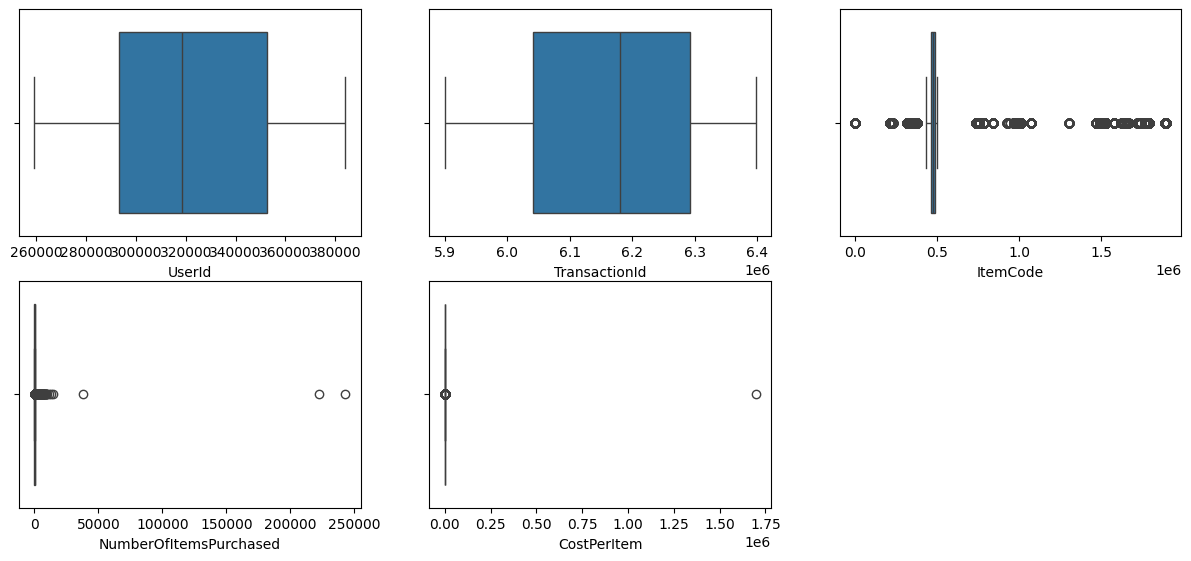

In [130]:
# ambil kolom yang numerik
numerik = data.select_dtypes(include = 'number') # float dan int

plt.figure(figsize = (15,10)) # (kolom, bairs)
posisi = 1
for kolom in numerik.columns:
    plt.subplot(3, 3, posisi) # (baris, kolom, posisi)
    sns.boxplot(x = data[kolom])
    posisi += 1

# mengeprint grafik
plt.show()

In [131]:
# ambil numerik saja
numerik = data.select_dtypes(include = 'number')
list_jumlah_outliers = []
for kolom in numerik.columns:
    q3 = numerik.describe().loc['75%', kolom]
    q1 = numerik.describe().loc['25%', kolom]
    iqr = q3 - q1
    whis = 1.5 * iqr
    batas_atas = q3 + whis
    batas_bawah = q1 - whis

    # jumlah outliers
    jumlah_outliers = len(data[(data[kolom]>batas_atas) | (data[kolom]<batas_bawah)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah_outliers': list_jumlah_outliers
})

,kolom,jumlah_outliers
0,UserId,0
1,TransactionId,0
2,ItemCode,67447
3,NumberOfItemsPurchased,25601
4,CostPerItem,32921


In [132]:
data.describe()

,UserId,TransactionId,TransactionTime,ItemCode,NumberOfItemsPurchased,CostPerItem
count,391282.000000,3.912820e+05,391282,3.912820e+05,391282.00000,3.912820e+05
mean,321191.320403,6.166531e+06,2018-09-21 15:48:04.501970432,6.459021e+05,39.52798,8.329734e+00
min,259266.000000,5.900015e+06,2018-02-12 04:26:00,4.200000e+01,3.00000,6.000000e-02
25%,293349.000000,6.041585e+06,2018-06-19 07:16:00,4.625670e+05,6.00000,1.730000e+00
50%,318297.000000,6.180636e+06,2018-10-12 08:08:00,4.759860e+05,18.00000,2.700000e+00
75%,352674.000000,6.292693e+06,2019-01-01 08:57:00,4.886700e+05,36.00000,5.180000e+00
max,384027.000000,6.397457e+06,2019-02-20 08:50:00,1.894494e+06,242985.00000,1.696285e+06
std,35913.396844,1.439571e+05,NaN,4.329260e+05,545.65348,2.711778e+03


### Melakukan Pengecekan dan Pemahaman NumberofItemsPurchased > 200000

In [133]:
data[data['NumberOfItemsPurchased'] > 200000]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
290310,345366,6396313,2019-02-20 05:15:00,500703,"PAPER CRAFT , LITTLE BIRDIE",242985,2.88,United Kingdom
297133,259266,5955741,2018-04-01 06:01:00,486486,MEDIUM CERAMIC TOP STORAGE JAR,222645,1.44,United Kingdom


#### Kesimpulan Pengecekan dan Pemahaman NumberofItemsPurchased > 200000

Data dipertahankan, karena ItemDescription dan NumberofItemsPurchased masih logis untuk di analisis

### Melakukan Pengecekan dan Pemahaman CostPerItem > 1500000

In [134]:
data[data['CostPerItem'] > 1500000]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
203334,288687,5900323,2018-02-12 06:37:00,465780,RETROSPOT LAMP,24,1696285.44,United Kingdom


#### Kesimpulan Pengecekan dan Pemahaman CostPerItem > 1500000

Menghapus Retrospot Lamp, karena tidak masuk logika harga retrospot lamp per itemnya sebesar 1696285.44

In [135]:
data.drop(data[data['ItemDescription'] == 'RETROSPOT LAMP'].index, inplace = True)

### Melakukan Pengecekan dan Pemahaman Outliers selanjutnya

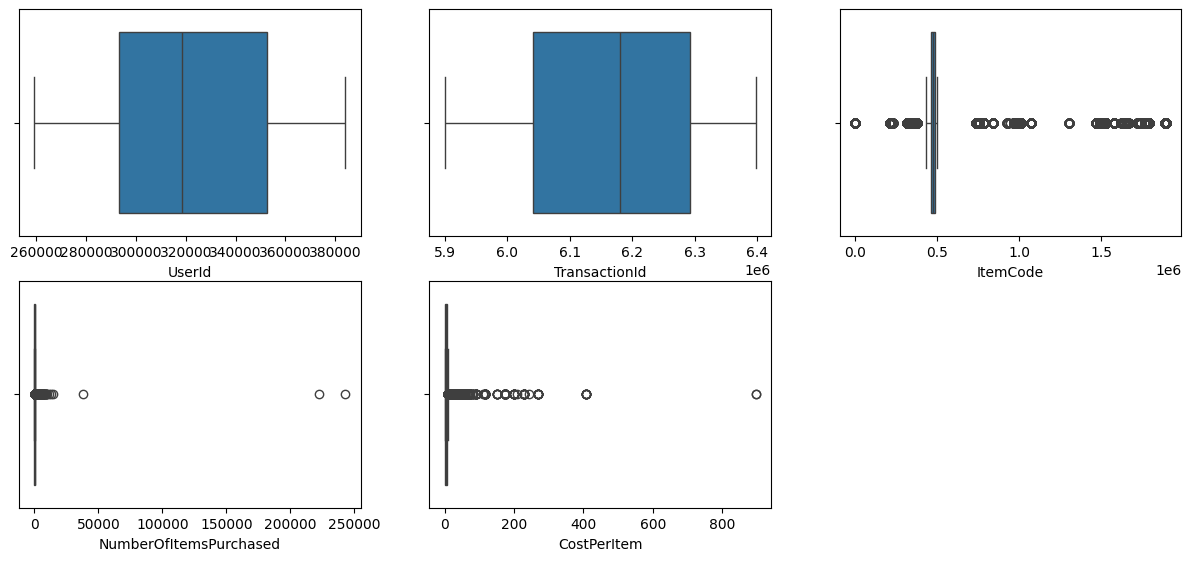

In [136]:
# ambil kolom yang numerik
numerik = data.select_dtypes(include = 'number') # float dan int

plt.figure(figsize = (15,10)) # (kolom, bairs)
posisi = 1
for kolom in numerik.columns:
    plt.subplot(3, 3, posisi) # (baris, kolom, posisi)
    sns.boxplot(x = data[kolom])
    posisi += 1

# mengeprint grafik
plt.show()

In [137]:
data.describe()

,UserId,TransactionId,TransactionTime,ItemCode,NumberOfItemsPurchased,CostPerItem
count,391151.000000,3.911510e+05,391151,3.911510e+05,391151.000000,391151.000000
mean,321191.140391,6.166554e+06,2018-09-21 16:13:05.609291520,6.459625e+05,39.538925,3.991321
min,259266.000000,5.900015e+06,2018-02-12 04:26:00,4.200000e+01,3.000000,0.060000
25%,293349.000000,6.041585e+06,2018-06-19 07:16:00,4.625670e+05,6.000000,1.730000
50%,318297.000000,6.180647e+06,2018-10-12 08:16:00,4.759860e+05,18.000000,2.700000
75%,352674.000000,6.292715e+06,2019-01-01 09:06:00,4.886700e+05,36.000000,5.180000
max,384027.000000,6.397457e+06,2019-02-20 08:50:00,1.894494e+06,242985.000000,896.310000
std,35912.085134,1.439586e+05,NaN,4.329859e+05,545.744506,6.036758


#### Mencari ItemCode dengan code 1.894494e+06

In [138]:
data[data['ItemCode'] == 1894494]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
657,306726,6004218,2018-05-19 09:33:00,1894494,"LETTER ""P"" BLING KEY RING",3,1.73,United Kingdom
8563,306726,6088533,2018-07-29 09:20:00,1894494,"LETTER ""C"" BLING KEY RING",3,1.73,United Kingdom
12848,306726,6167656,2018-10-01 08:14:00,1894494,"LETTER ""M"" BLING KEY RING",3,1.73,United Kingdom
15715,306726,6142851,2018-09-10 08:59:00,1894494,"LETTER ""H"" BLING KEY RING",3,1.73,United Kingdom
28299,306726,6040111,2018-06-18 07:34:00,1894494,"LETTER ""A"" BLING KEY RING",3,1.73,United Kingdom
...,...,...,...,...,...,...,...,...
379844,289590,6387601,2019-02-16 11:48:00,1894494,"LETTER ""K"" BLING KEY RING",36,0.41,United Kingdom
381864,306726,6099401,2018-08-05 09:50:00,1894494,"LETTER ""P"" BLING KEY RING",3,1.73,United Kingdom
387259,306726,5902501,2018-02-12 12:57:00,1894494,"LETTER ""S"" BLING KEY RING",3,1.73,United Kingdom
390801,310716,6395675,2019-02-19 11:31:00,1894494,"LETTER ""N"" BLING KEY RING",3,0.41,United Kingdom


In [139]:
data[data['ItemCode'] == 488670]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
3073,264537,6306982,2019-01-11 09:06:00,488670,SET OF 2 CERAMIC PAINTED HEARTS,36,2.01,Spain
3950,303429,6268273,2018-12-18 09:29:00,488670,SET OF 2 CERAMIC PAINTED HEARTS,9,2.01,United Kingdom
4707,344589,6317388,2019-01-15 12:45:00,488670,SET OF 2 CERAMIC PAINTED HEARTS,18,2.01,United Kingdom
6722,306453,6350267,2019-01-30 08:48:00,488670,SET OF 2 CERAMIC PAINTED HEARTS,12,2.01,United Kingdom
18210,354732,6363588,2019-02-05 09:06:00,488670,SET OF 2 CERAMIC PAINTED HEARTS,3,2.01,United Kingdom
...,...,...,...,...,...,...,...,...
394867,356538,6248594,2018-12-05 08:50:00,488670,SET OF 2 CERAMIC PAINTED HEARTS,18,2.01,United Kingdom
395825,313530,6205023,2018-11-04 06:29:00,488670,SET OF 2 CERAMIC PAINTED HEARTS,36,2.01,Channel Islands
400071,354249,6290295,2018-12-31 08:34:00,488670,SET OF 2 CERAMIC PAINTED HEARTS,18,2.01,United Kingdom
400323,317205,6263059,2018-12-15 11:32:00,488670,SET OF 2 CERAMIC PAINTED HEARTS,36,2.01,United Kingdom


##### Kesimpulan ItemCode Pemahaman Outliers Selanjutnya

ItemCode pada Pemahaman Outliers selanjutnya aman atau bisa di analisis

#### Mencari CostPerItem diatas 400

In [140]:
data[data['CostPerItem'] > 400]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
87860,317058,6120884,2018-08-22 11:28:00,472542,PICNIC BASKET WICKER 60 PIECES,180,896.31,United Kingdom
144874,317058,6120906,2018-08-22 11:33:00,472542,PICNIC BASKET WICKER 60 PIECES,3,896.31,United Kingdom
179432,314433,6065323,2018-07-10 08:22:00,475776,VINTAGE BLUE KITCHEN CABINET,3,407.10,United Kingdom
182292,273315,6103196,2018-08-07 12:25:00,475755,VINTAGE RED KITCHEN CABINET,3,407.10,United Kingdom
235700,276045,5905185,2018-02-13 14:06:00,475755,VINTAGE RED KITCHEN CABINET,3,407.10,United Kingdom
249121,348747,5929880,2018-02-27 04:41:00,475755,VINTAGE RED KITCHEN CABINET,3,407.10,United Kingdom
316154,365526,5947117,2018-03-24 10:57:00,475755,VINTAGE RED KITCHEN CABINET,3,407.10,United Kingdom
345215,282492,6025954,2018-06-06 10:19:00,475776,VINTAGE BLUE KITCHEN CABINET,3,407.10,United Kingdom
377539,311682,5975783,2018-04-18 11:32:00,475755,VINTAGE RED KITCHEN CABINET,3,407.10,United Kingdom
378514,282492,6011280,2018-05-26 07:38:00,475776,VINTAGE BLUE KITCHEN CABINET,3,407.10,United Kingdom


##### Kesimpulan CostPerItem Pada Outliers Selanjutnya

CostPerItem Pada Outliers Selanjutnya bisa dianalisis lebih lanjut karena ItemDescription dan CostPerItem pada pemahaman analisis yang aman

## JUMLAH OUTLIERS

In [141]:
# ambil numerik saja
numerik = data.select_dtypes(include = 'number')
list_jumlah_outliers = []
for kolom in numerik.columns:
    q3 = numerik.describe().loc['75%', kolom]
    q1 = numerik.describe().loc['25%', kolom]
    iqr = q3 - q1
    whis = 1.5 * iqr
    batas_atas = q3 + whis
    batas_bawah = q1 - whis

    # jumlah outliers
    jumlah_outliers = len(data[(data[kolom]>batas_atas) | (data[kolom]<batas_bawah)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah_outliers': list_jumlah_outliers
})

,kolom,jumlah_outliers
0,UserId,0
1,TransactionId,0
2,ItemCode,67447
3,NumberOfItemsPurchased,25601
4,CostPerItem,32790


## kesimpulan Outliers

Saya mempertahankan outliers, karena untuk outliers yang tidak bisa dianalisis sudah saya bersihkan dan sekarang data memiliki data yang dapat di analisis lebih lanjut

# RFM

In [142]:
data['TransactionTime'] = pd.to_datetime(data['TransactionTime'])

data['TotalSpent'] = data['NumberOfItemsPurchased'] * data['CostPerItem']

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391151 entries, 0 to 401568
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   UserId                  391151 non-null  int64         
 1   TransactionId           391151 non-null  int64         
 2   TransactionTime         391151 non-null  datetime64[ns]
 3   ItemCode                391151 non-null  int64         
 4   ItemDescription         391151 non-null  object        
 5   NumberOfItemsPurchased  391151 non-null  int64         
 6   CostPerItem             391151 non-null  float64       
 7   Country                 391151 non-null  object        
 8   TotalSpent              391151 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 29.8+ MB


In [144]:
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,TotalSpent
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19
4,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,42.24


In [145]:
current_date = data['TransactionTime'].max()
current_date

Timestamp('2019-02-20 08:50:00')

In [146]:
rfm = data.groupby('UserId').agg({
    'TransactionTime': lambda x: (current_date - x.max()).days,  # Recency
    'TransactionId': 'count',  # Frequency
    'TotalSpent': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['UserId', 'Recency', 'Frequency', 'Monetary']

rfm

,UserId,Recency,Frequency,Monetary
0,259266,325,1,320608.80
1,259287,1,182,17879.70
2,259308,74,27,5991.12
3,259329,18,72,6043.92
4,259350,309,16,1221.60
...,...,...,...,...
4329,383880,277,9,666.21
4330,383901,180,7,334.80
4331,383922,7,12,739.20
4332,383943,3,719,8465.61


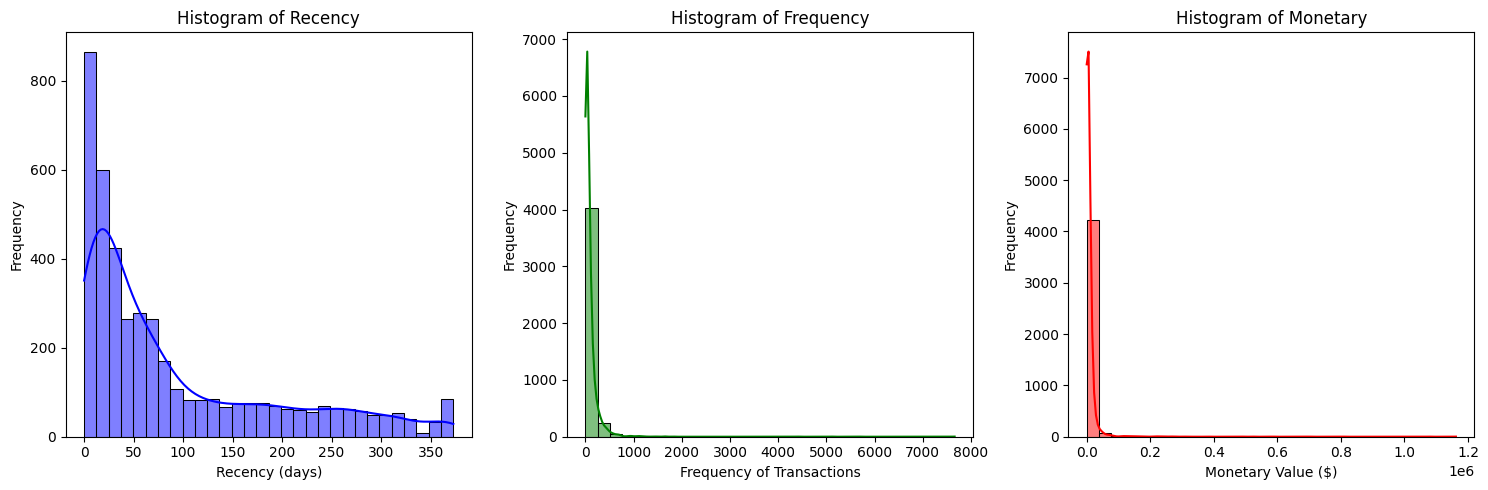

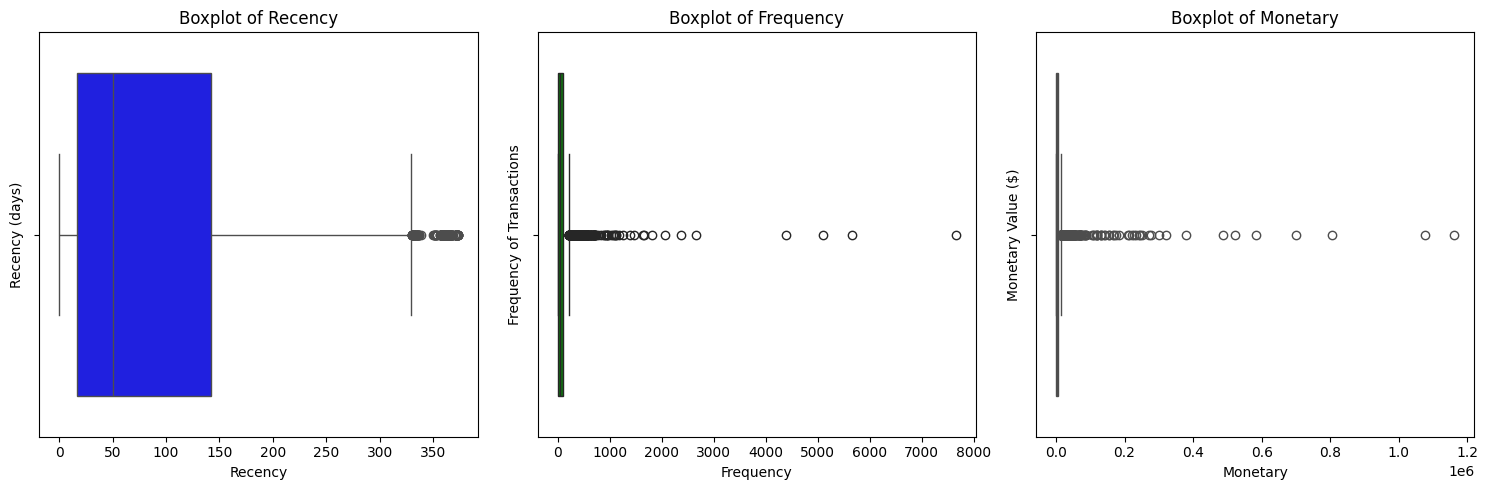

In [147]:
# Visualisasi histogram untuk Recency, Frequency, dan Monetary
plt.figure(figsize=(15, 5))

# Histogram Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=True, color='blue', bins=30)
plt.title('Histogram of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')

# Histogram Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=True, color='green', bins=30)
plt.title('Histogram of Frequency')
plt.xlabel('Frequency of Transactions')
plt.ylabel('Frequency')

# Histogram Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], kde=True, color='red', bins=30)
plt.title('Histogram of Monetary')
plt.xlabel('Monetary Value ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualisasi boxplot untuk Recency, Frequency, dan Monetary
plt.figure(figsize=(15, 5))

# Boxplot Recency
plt.subplot(1, 3, 1)
sns.boxplot(x=rfm['Recency'], color='blue')
plt.title('Boxplot of Recency')
plt.ylabel('Recency (days)')

# Boxplot Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x=rfm['Frequency'], color='green')
plt.title('Boxplot of Frequency')
plt.ylabel('Frequency of Transactions')

# Boxplot Monetary
plt.subplot(1, 3, 3)
sns.boxplot(x=rfm['Monetary'], color='red')
plt.title('Boxplot of Monetary')
plt.ylabel('Monetary Value ($)')

plt.tight_layout()
plt.show()

In [148]:
rfm

,UserId,Recency,Frequency,Monetary
0,259266,325,1,320608.80
1,259287,1,182,17879.70
2,259308,74,27,5991.12
3,259329,18,72,6043.92
4,259350,309,16,1221.60
...,...,...,...,...
4329,383880,277,9,666.21
4330,383901,180,7,334.80
4331,383922,7,12,739.20
4332,383943,3,719,8465.61


In [149]:
rfm.describe()

,UserId,Recency,Frequency,Monetary
count,4334.000000,4334.000000,4334.000000,4.334000e+03
mean,321281.907245,91.619982,90.251731,8.380767e+03
std,36164.360461,100.092965,225.127234,3.705457e+04
min,259266.000000,0.000000,1.000000,1.557000e+01
25%,290057.250000,17.000000,17.000000,1.262527e+03
50%,321247.500000,50.000000,41.000000,2.751690e+03
75%,352353.750000,142.000000,98.000000,6.765157e+03
max,384027.000000,373.000000,7662.000000,1.162034e+06


In [150]:
# Mencari nilai 90% quantile untuk setiap kolom
recency_90 = rfm['Recency'].quantile(0.90)
frequency_90 = rfm['Frequency'].quantile(0.90)
monetary_90 = rfm['Monetary'].quantile(0.90)

print(f"Nilai 90% quantile untuk Recency: {recency_90}")
print(f"Nilai 90% quantile untuk Frequency: {frequency_90}")
print(f"Nilai 90% quantile untuk Monetary: {monetary_90}")

Nilai 90% quantile untuk Recency: 262.0
Nilai 90% quantile untuk Frequency: 202.0
Nilai 90% quantile untuk Monetary: 14778.861000000003


In [151]:
# Menambahkan kolom 'RFM_Score' ke rfm_df berdasarkan kategori yang disesuaikan
def rfm_score(baris):
    # Recency (dalam hari, dengan berdasarkan persentil atau rentang yang sesuai)
    if baris['Recency'] <= 17:  # 25% quantile
        r = 5
    elif baris['Recency'] <= 50:  # Median (50% quantile)
        r = 4
    elif baris['Recency'] <= 142:  # 75% quantile
        r = 3
    elif baris['Recency'] <= 262:  # 90% quantile
        r = 2
    else:
        r = 1

    # Frequency (jumlah transaksi)
    if baris['Frequency'] <= 17:
        f = 1
    elif baris['Frequency'] <= 41:
        f = 2
    elif baris['Frequency'] <= 98:
        f = 3
    elif baris['Frequency'] <= 202:
        f = 4
    else:
        f = 5

    # Monetary (total pengeluaran)
    if baris['Monetary'] <= 1263:  # 25% quantile
        m = 1
    elif baris['Monetary'] <= 2752:  # Median (50% quantile)
        m = 2
    elif baris['Monetary'] <= 6766:  # 75% quantile
        m = 3
    elif baris['Monetary'] <= 14779:  # 90% quantile
        m = 4
    else:
        m = 5

    return r + f + m

# Asumsi rfm_df adalah DataFrame yang sudah ada, misalnya:
# rfm_df = pd.read_csv('data.csv') # Data dengan kolom 'Recency', 'Frequency', 'Monetary'

# Menerapkan fungsi rfm_score ke DataFrame rfm_df dan membuat kolom 'RFM_Score'
rfm['RFM_Score'] = rfm.apply(rfm_score, axis=1)

# Menampilkan hasil RFM
rfm

,UserId,Recency,Frequency,Monetary,RFM_Score
0,259266,325,1,320608.80,7
1,259287,1,182,17879.70,14
2,259308,74,27,5991.12,8
3,259329,18,72,6043.92,10
4,259350,309,16,1221.60,3
...,...,...,...,...,...
4329,383880,277,9,666.21,3
4330,383901,180,7,334.80,4
4331,383922,7,12,739.20,7
4332,383943,3,719,8465.61,14


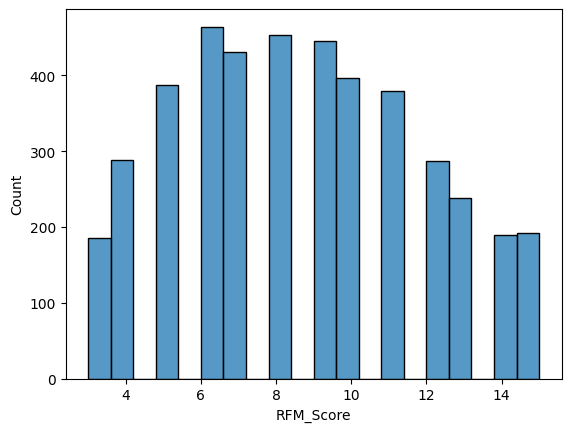

In [152]:
sns.histplot(rfm['RFM_Score'])
plt.show()

In [153]:
import pandas as pd

# Fungsi untuk menghitung skor R, F, dan M berdasarkan kriteria yang disesuaikan
def rfm_score(baris):
    # Recency
    if baris['Recency'] <= 17:       # Sesuai dengan Q1 Recency
        r = 5
    elif baris['Recency'] <= 50:     # Sesuai dengan Median Recency
        r = 4
    elif baris['Recency'] <= 142:    # Sesuai dengan Q3 Recency
        r = 3
    elif baris['Recency'] <= 262:    # Sesuai dengan 90% Quantile
        r = 2
    else:
        r = 1

    # Frequency
    if baris['Frequency'] <= 17:     # Disesuaikan dengan batas rendah Frequency
        f = 1
    elif baris['Frequency'] <= 41:   # Sesuai dengan Median Frequency
        f = 2
    elif baris['Frequency'] <= 98:   # Disesuaikan dengan Q3 Frequency
        f = 3
    elif baris['Frequency'] <= 202:  # Sesuai dengan 90% Quantile
        f = 4
    else:
        f = 5

    # Monetary
    if baris['Monetary'] <= 1263:    # Sesuai dengan Q1 Monetary
        m = 1
    elif baris['Monetary'] <= 2752:  # Sesuai dengan Median Monetary
        m = 2
    elif baris['Monetary'] <= 6766:  # Sesuai dengan Q3 Monetary
        m = 3
    elif baris['Monetary'] <= 14779: # Sesuai dengan 90% Quantile
        m = 4
    else:
        m = 5

    return pd.Series({'R_Score': r, 'F_Score': f, 'M_Score': m})

# Menambahkan kolom R_Score, F_Score, dan M_Score ke dalam rfm
rfm[['R_Score', 'F_Score', 'M_Score']] = rfm.apply(rfm_score, axis=1)

# Menghitung kolom RFM_Score sebagai jumlah dari R, F, dan M
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

# Menampilkan hasil akhir DataFrame
rfm

,UserId,Recency,Frequency,Monetary,RFM_Score,R_Score,F_Score,M_Score
0,259266,325,1,320608.80,7,1,1,5
1,259287,1,182,17879.70,14,5,4,5
2,259308,74,27,5991.12,8,3,2,3
3,259329,18,72,6043.92,10,4,3,3
4,259350,309,16,1221.60,3,1,1,1
...,...,...,...,...,...,...,...,...
4329,383880,277,9,666.21,3,1,1,1
4330,383901,180,7,334.80,4,2,1,1
4331,383922,7,12,739.20,7,5,1,1
4332,383943,3,719,8465.61,14,5,5,4


In [154]:
rfm['FM_Score'] = rfm['F_Score'] + rfm['M_Score']

# Manual Clustering using IF-ELSE Conditions
def segment_customer(row):
    recency = row['R_Score']
    fm_combined = row['FM_Score']
    if recency >= 4 and fm_combined >= 4:
        return 'Champions'
    elif recency >= 3 and fm_combined >= 3:
        return 'Loyal Customers'
    elif recency >= 2 and fm_combined >= 3:
        return 'Potential Loyalist'
    elif recency >= 3 and fm_combined <= 2:
        return 'Promising'
    elif recency < 2 and fm_combined >= 3:
        return 'At Risk'
    elif recency < 2 and fm_combined <= 2:
        return 'Lost'
    else:
        return 'Uncategorized'

# Apply the segmentation function
rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)
rfm

,UserId,Recency,Frequency,Monetary,RFM_Score,R_Score,F_Score,M_Score,FM_Score,Customer_Segment
0,259266,325,1,320608.80,7,1,1,5,6,At Risk
1,259287,1,182,17879.70,14,5,4,5,9,Champions
2,259308,74,27,5991.12,8,3,2,3,5,Loyal Customers
3,259329,18,72,6043.92,10,4,3,3,6,Champions
4,259350,309,16,1221.60,3,1,1,1,2,Lost
...,...,...,...,...,...,...,...,...,...,...
4329,383880,277,9,666.21,3,1,1,1,2,Lost
4330,383901,180,7,334.80,4,2,1,1,2,Uncategorized
4331,383922,7,12,739.20,7,5,1,1,2,Promising
4332,383943,3,719,8465.61,14,5,5,4,9,Champions


In [155]:
rfm['Customer_Segment'].value_counts()

,count
Customer_Segment,
Champions,1855
Loyal Customers,1030
Potential Loyalist,449
Promising,371
At Risk,247
Uncategorized,197
Lost,185


In [156]:
rfm['Customer_Segment'].value_counts()/len(rfm)*100

,count
Customer_Segment,
Champions,42.801108
Loyal Customers,23.765575
Potential Loyalist,10.359945
Promising,8.560222
At Risk,5.699123
Uncategorized,4.545455
Lost,4.268574


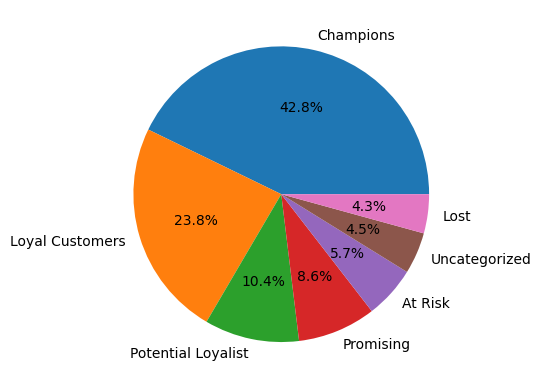

In [157]:
plt.pie(rfm['Customer_Segment'].value_counts(), labels=rfm['Customer_Segment'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [158]:
import plotly as py
import plotly.graph_objs as go

# Buat pemetaan warna untuk setiap segmen customer
color_map = {
    'Champions': 'blue',
    'Loyal Customers': 'green',
    'Potential Loyalist': 'orange',
    'Promising': 'purple',
    'At Risk': 'red',
    'Lost': 'gray',
    'Uncategorized': 'black'
}

# Ubah warna marker menggunakan pemetaan
colors = [color_map[segment] for segment in rfm['Customer_Segment']]

trace1_non_ml = go.Scatter3d(
    x=rfm['R_Score'],
    y=rfm['F_Score'],
    z=rfm['M_Score'],
    mode='markers',
    marker=dict(color=colors, size=5, opacity=0.8)  # Gunakan colors
)

dataa1_non_ml = [trace1_non_ml]

layout1_non_ml = go.Layout(
    title='Cluster',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    )
)

fig1_non_ml = go.Figure(data=dataa1_non_ml, layout=layout1_non_ml)
py.offline.iplot(fig1_non_ml)

In [159]:
import plotly as py
import plotly.graph_objs as go

# Buat pemetaan warna untuk setiap segmen customer
color_map = {
    'Champions': 'blue',
    'Loyal Customers': 'green',
    'Potential Loyalist': 'orange',
    'Promising': 'purple',
    'At Risk': 'red',
    'Lost': 'gray',
    'Uncategorized': 'black'
}

# Ubah warna marker menggunakan pemetaan
colors = [color_map[segment] for segment in rfm['Customer_Segment']]

trace1_non_ml = go.Scatter3d(
    x=rfm['Recency'],
    y=rfm['Frequency'],
    z=rfm['Monetary'],
    mode='markers',
    marker=dict(color=colors, size=5, opacity=0.8)  # Gunakan colors
)

dataa1_non_ml = [trace1_non_ml]

layout1_non_ml = go.Layout(
    title='Cluster',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    )
)

fig1_non_ml = go.Figure(data=dataa1_non_ml, layout=layout1_non_ml)
py.offline.iplot(fig1_non_ml)